# Exercise 3.1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [145]:
#using 2013_movies.csv
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from datetime import datetime
%matplotlib inline

In [113]:
#import data and evaluate data fields
df = pd.DataFrame.from_csv('/Users/danvigil/ds/metis/metisgh/sf16_ds4/challenges/03-linear_splitting/2013_movies.csv')
df['constant']=1
data = df.dropna(inplace=True) #drop NaNs
df.count()

Budget                87
DomesticTotalGross    87
Director              87
Rating                87
Runtime               87
ReleaseDate           87
constant              87
dtype: int64

/Users/danvigil/anaconda/lib/python3.5/site-packages/statsmodels/regression/linear_model.py:1191: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


                            OLS Regression Results                            
Dep. Variable:     DomesticTotalGross   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Thu, 13 Oct 2016   Prob (F-statistic):                nan
Time:                        21:47:48   Log-Likelihood:                -1714.4
No. Observations:                  87   AIC:                             3431.
Df Residuals:                      86   BIC:                             3433.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
constant    1.035e+08   9.43e+06     10.975      0.0

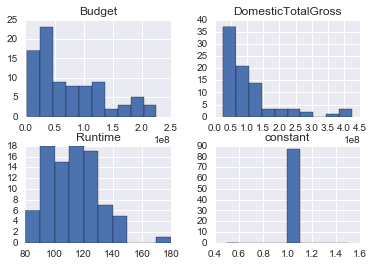

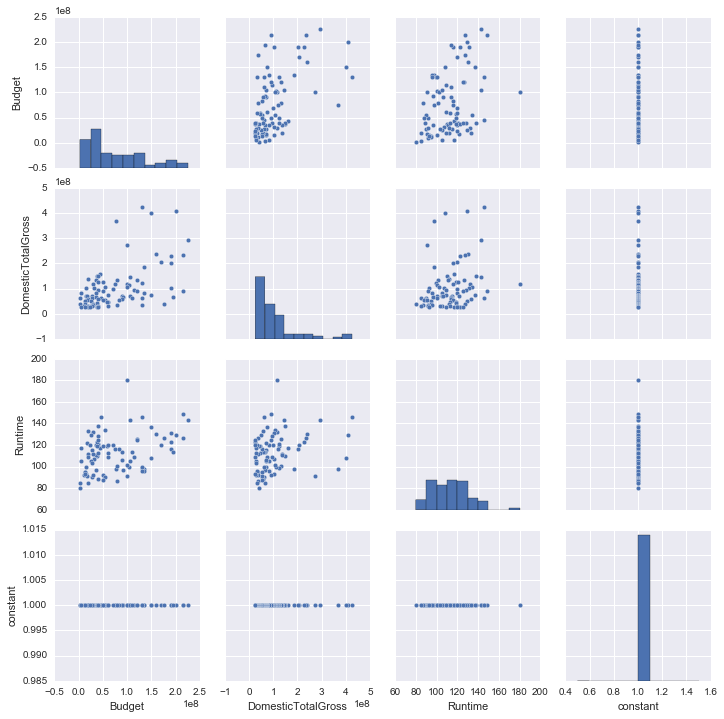

In [147]:
# build OLS model & examine results
X = df['constant']
y = df['DomesticTotalGross']

model = smf.OLS(y, X)
results = model.fit()
y_pred = results.predict(X)
print(results.summary())
y.mean()
df.hist()
sns.pairplot(df);

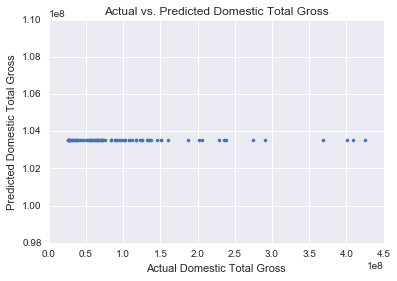

In [148]:
# plot actuals vs. predicted
plt.plot(y, y_pred,'.')
plt.xlabel('Actual Domestic Total Gross')
plt.ylabel('Predicted Domestic Total Gross')
plt.title('Actual vs. Predicted Domestic Total Gross');

The horizontal distribution resulting from plotting Actual vs. Predicted shows that using a constant term variable to predict Domestic Gross is an exercise in extreme multicollinearity, as it returns the mean of Domestic Gross: $100.5M.

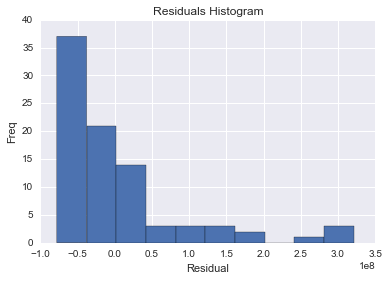

In [149]:
residuals = y - y_pred
plt.hist(residuals)
plt.xlabel('Residual')
plt.ylabel('Freq')
plt.title('Residuals Histogram');

The distribution of the residuals appears to be geometric, rather than Gaussian. 

# Exercise 3.2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [150]:
X2 = df[['Budget','constant']] #adding continuous variable to constant variable

model2 = smf.OLS(y, X2)
results2 = model2.fit()
y_pred2 = results2.predict(X2)
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:     DomesticTotalGross   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     33.43
Date:                Thu, 13 Oct 2016   Prob (F-statistic):           1.19e-07
Time:                        21:48:05   Log-Likelihood:                -1700.0
No. Observations:                  87   AIC:                             3404.
Df Residuals:                      85   BIC:                             3409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Budget         0.7831      0.135      5.782      0.0

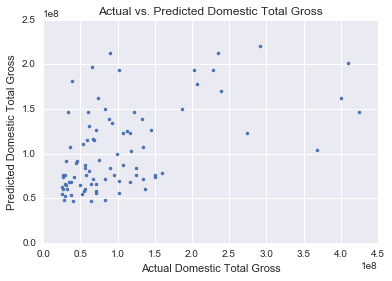

In [151]:
plt.plot(y, y_pred2, '.')
plt.xlabel('Actual Domestic Total Gross')
plt.ylabel('Predicted Domestic Total Gross')
plt.title('Actual vs. Predicted Domestic Total Gross');

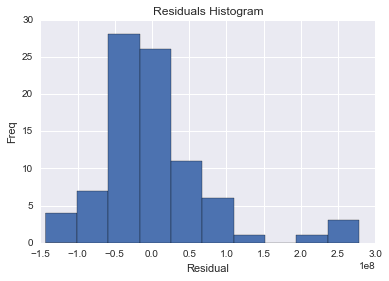

In [152]:
residuals2 = y - y_pred2
plt.hist(residuals2)
plt.xlabel('Residual')
plt.ylabel('Freq')
plt.title('Residuals Histogram');

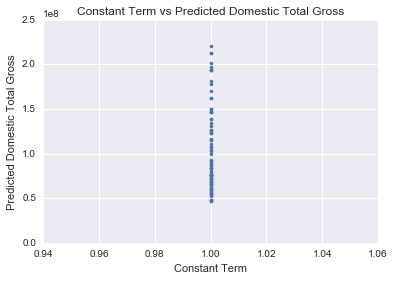

In [153]:
plt.plot(df['constant'], y_pred2, '.')
plt.xlabel('Constant Term')
plt.ylabel('Predicted Domestic Total Gross')
plt.title('Constant Term vs Predicted Domestic Total Gross');

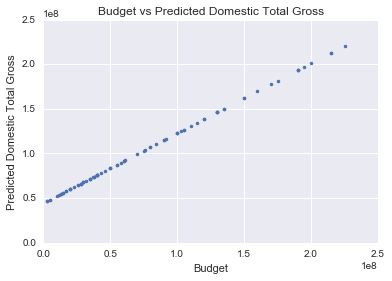

In [154]:
plt.plot(df['Budget'], y_pred2, '.')
plt.xlabel('Budget')
plt.ylabel('Predicted Domestic Total Gross')
plt.title('Budget vs Predicted Domestic Total Gross');

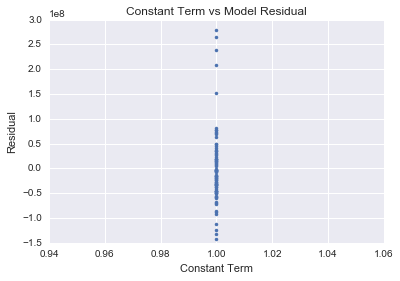

In [155]:
plt.plot(df['constant'], residuals2, '.')
plt.xlabel('Constant Term')
plt.ylabel('Residual')
plt.title('Constant Term vs Model Residual');

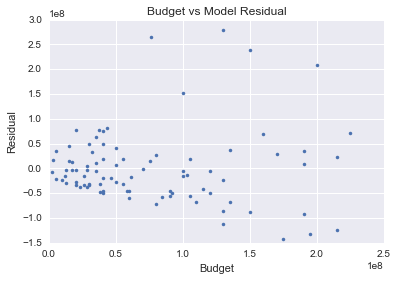

In [156]:
plt.plot(df['Budget'], residuals2, '.')
plt.xlabel('Budget')
plt.ylabel('Residual')
plt.title('Budget vs Model Residual');

Domestic Total Gross values and the Budget feature have perfectly linear relationship. But because there is still a constant term in the features, there is still strong colinearity. The residuals distribution is becoming more Gaussian.

# Exercise 3.3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [157]:
X3 = df[['constant', 'Budget', 'Rating']]  #adding categorical feature
X3 = pd.get_dummies(X3, drop_first = True) #create dummy variables for categories

model3 = smf.OLS(y, X3)
results3 = model3.fit()
y_pred3 = results3.predict(X3)
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:     DomesticTotalGross   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     11.13
Date:                Thu, 13 Oct 2016   Prob (F-statistic):           3.25e-06
Time:                        21:48:32   Log-Likelihood:                -1699.7
No. Observations:                  87   AIC:                             3407.
Df Residuals:                      83   BIC:                             3417.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
constant      5.773e+07   2.51e+07      2.303   

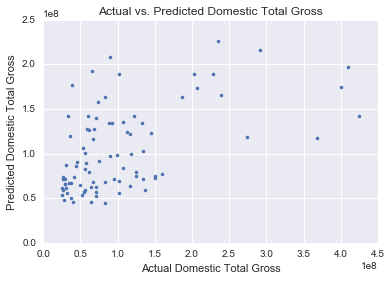

In [158]:
plt.plot(y, y_pred3, '.')
plt.xlabel('Actual Domestic Total Gross')
plt.ylabel('Predicted Domestic Total Gross')
plt.title('Actual vs. Predicted Domestic Total Gross');

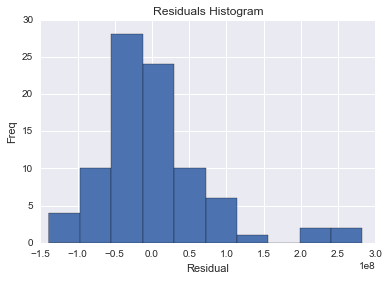

In [159]:
residuals3 = y - y_pred3
plt.hist(residuals3)
plt.xlabel('Residual')
plt.ylabel('Freq')
plt.title('Residuals Histogram');

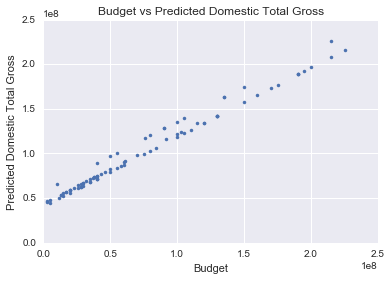

In [160]:
plt.plot(df['Budget'], y_pred3, '.')
plt.xlabel('Budget')
plt.ylabel('Predicted Domestic Total Gross')
plt.title('Budget vs Predicted Domestic Total Gross');

Adding a categorical variable provided only a slight increase to R-squared (and a decrease to Adjusted R-squared).  The model still raises strong multi-collinearity warnings. Perhaps the model fits the sample of data so closely that it's fitting the noise, outliers, and all the other variance?

# Exercise 3.4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [163]:
X4 = df[['Budget', 'Rating', 'Runtime']]  #remove constant & add Runtime
X4 = pd.get_dummies(X4) #create dummy variables for Rating

model4 = smf.OLS(y, X4)
results4 = model4.fit()
y_pred4 = results4.predict(X4)
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:     DomesticTotalGross   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     8.730
Date:                Thu, 13 Oct 2016   Prob (F-statistic):           6.38e-06
Time:                        22:20:19   Log-Likelihood:                -1699.0
No. Observations:                  87   AIC:                             3408.
Df Residuals:                      82   BIC:                             3420.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Budget           0.6957      0.172      4.054   

Adding Runtime and removing the Constant Term variable increased R-squared significantly, as expected. Budget (P: 0.00) and PG Rating (P: .954) are the most strongly correlated features.

# Exercise 3.5

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.25)

model5 = smf.OLS(y_train, X_train)
results5 = model5.fit()
y_pred_test = results5.predict(X_test)
print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:     DomesticTotalGross   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     5.455
Date:                Thu, 13 Oct 2016   Prob (F-statistic):           0.000819
Time:                        22:21:31   Log-Likelihood:                -1261.9
No. Observations:                  65   AIC:                             2534.
Df Residuals:                      60   BIC:                             2545.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Budget           0.5565      0.172      3.242   

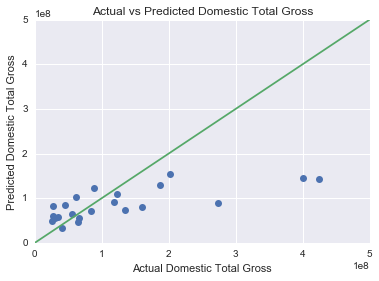

In [165]:
plt.plot(y_test, y_pred_test, 'o')
line = np.linspace(0,10e8)
plt.xlim([0,5e8])
plt.ylim([0,5e8])
plt.plot(line,line)
plt.xlabel('Actual Domestic Total Gross')
plt.ylabel('Predicted Domestic Total Gross')
plt.title('Actual vs Predicted Domestic Total Gross');

While the model appears to fit where Actual and Predicted < 1.25(1e8), as the gross becomes larger the model seems to diverge from the 1:1 relationship.